# Evaluation

The goal of this lab is to introduce you to techniques for evaluating your trained models. The motivation is to be able to select the model that has the best (expected) out-of-sample prediction and to assess the quality of the model.

## 1. Model Selection in a holdout setting

We will work with the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a> data set. The iris data set consists out of $4$ features (sepal length, sepal width, petal length, petal width) of three kinds of flowers in the iris family: iris setosa, iris versicolor, iris virginica. Our version of the data set has 150 data points with 50 for each class.

In [5]:
# Load the data
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
print('Loaded {} data points'.format(len(iris.data)))

X, y = iris.data, iris.target

print('Class labels: {}'.format(zip(range(3), iris.target_names)))

Loaded 150 data points
Class labels: <zip object at 0x0000025D86063F88>


We try to classify the iris versicolor with the help of the first two features.

In [6]:
import numpy as np

X_versi = X[:, :2] 
y_versi = np.zeros(len(y))
y_versi[y == 1] = 1

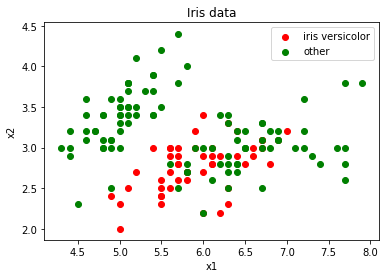

In [7]:
# plot iris data with two features
plt.scatter(X_versi[y_versi == 1, 0], X_versi[y_versi == 1, 1], c='red', label='iris versicolor')
plt.scatter(X_versi[y_versi == 0, 0], X_versi[y_versi == 0, 1], c='green', label='other')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Iris data')
plt.legend()

We split the data into a train and test (holdout) set with a split ratio of 75% to 25%.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_versi, y_versi, test_size=0.25, random_state=3)

The following function is a little visualization helper that draws the values of the decision function on a heat map given a matplotlib axe.

In [9]:
def show_decision_function(clf, ax):
    xx, yy = np.meshgrid(np.linspace(4.5, 8, 200), np.linspace(1.5, 4.0, 200))
    try:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    except AttributeError:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]

    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.jet)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(1.5, 4.0)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100)

We now train a SVM classifier on the training data and plot its decision boundary.

Text(0.5, 1.0, 'Decision function of a SVM classifier with gamma = 10, C = 1')

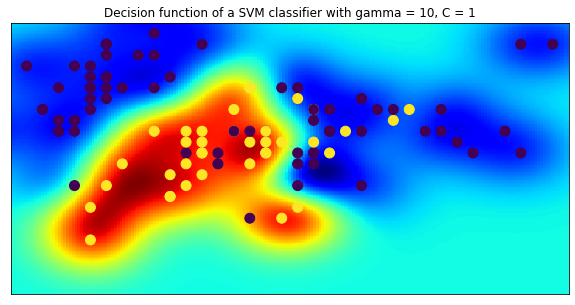

In [10]:
from sklearn.svm import SVC

clf_svm = SVC(gamma=10, C=1)
clf_svm.fit(X_train, y_train)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
show_decision_function(clf_svm, ax)
ax.set_title('Decision function of a SVM classifier with gamma = 10, C = 1')

#### Exercise 1.1 (Performance measures)
Classify the test data and evaluate the classification performance of the trained model 'clf_svm' using the scikit-learn metrics package. Compare various metrics (classification accuracy, precision, recall, f-score), interpret their values and argue which of them might be the most meaningful to report.

In [11]:
from sklearn import metrics


print(metrics.accuracy_score(y_test, clf_svm.predict(X_test)))
print(metrics.roc_auc_score(y_test, clf_svm.predict(X_test)))

print('Classification Report\n')
print('-----------------------')
print(metrics.classification_report(y_test, clf_svm.predict(X_test)))

0.7631578947368421
0.6923076923076923
Classification Report

-----------------------
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.84        26
         1.0       0.67      0.50      0.57        12

    accuracy                           0.76        38
   macro avg       0.73      0.69      0.70        38
weighted avg       0.75      0.76      0.75        38



In [12]:
#Alternative
#from sklearn import metrics

#pred_test = clf_svm.predict(X_test)

# accuracy
#print(f'Accuracy: {metrics.accuracy_score(y_test,pred_test)}')

# precision
#print(f'Precision: {metrics.precision_score(y_test,pred_test)}')

# recall
#print(f'Recall: {metrics.recall_score(y_test,pred_test)}')

# f-score
#print(f'F-Score: {metrics.f1_score(y_test,pred_test)}')

pred_test = clf_svm.predict(X_test)

pred_test

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

#### Exercise 1.2 (ROC curve)

To further evaluate the model, we want to plot a ROC (Receiver operating characteristic) curve and look at the AUC (area under the curve) value. Therefore, we provide a function "plot_roc_curves" that accepts increasing false positive rates (fprs) and true positive rates (tprs) and plots the curve for you. 

Please calculate the false and true positive rates of the classifier 'clf_svm' on the test data 'X_test' and draw the ROC curve by executing the function 'plot_roc_curves'. What does the ROC and AUC tell us about the classifier's performance?

In [13]:
# helper to plot ROC curves
def plot_roc_curves(fprs, tprs):    
    fig = plt.figure(figsize=(20,10))
    
    for fpr, tpr in zip(fprs, tprs):
        plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % metrics.auc(fpr, tpr))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

[0.5, 0.11538461538461539]
[0.8846153846153846, 0.5]

-------------

[[[ 6  6]
  [ 3 23]]

 [[23  3]
  [ 6  6]]]


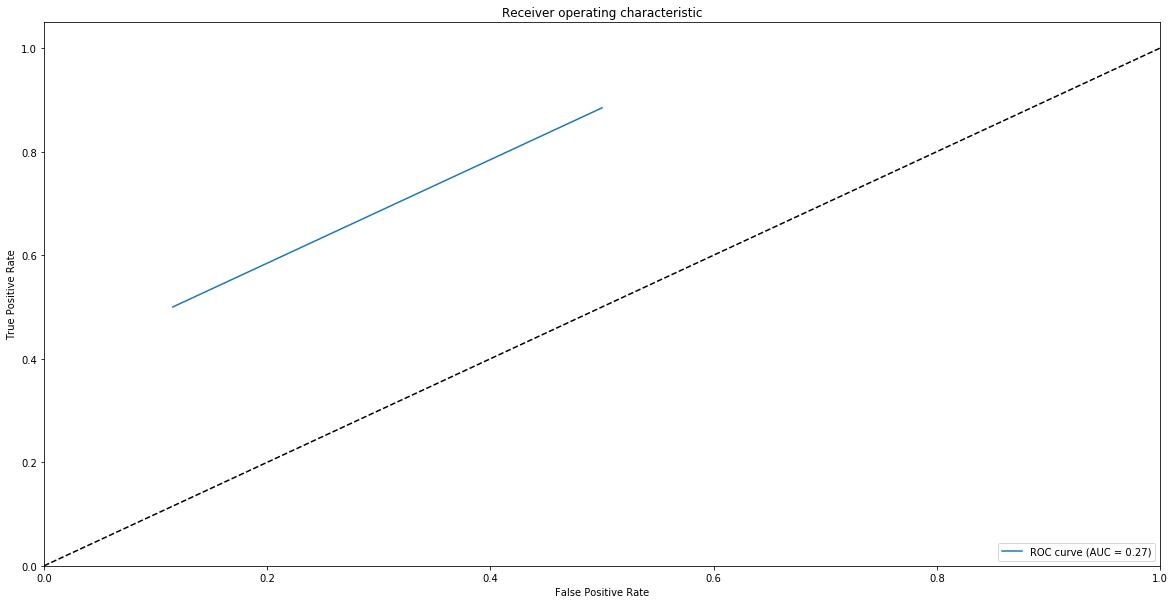

In [14]:
fp = 0
tp = 0
tn = 0
fn = 0

fpr = []
tpr = []

for i in range(len(X_test)):     
    if pred_test[i] == 1 and y_test.astype(int)[i] == 0:
        fn += 1

    elif pred_test[i] == 1 and y_test.astype(int)[i] == 1:
        tn += 1

    elif pred_test[i] == 0 and y_test.astype(int)[i] == 0:
        tp += 1
        
    elif pred_test[i] == 0 and y_test.astype(int)[i] == 1:
        fp += 1
        
fpr.append(fp / (fp + tn))
tpr.append(tp / (tp + fn))


fp = 0
tp = 0
tn = 0
fn = 0
        
        
for i in range(len(X_test)):
    if pred_test[i] == 1 and y_test.astype(int)[i] == 0:
        fp += 1

    elif pred_test[i] == 1 and y_test.astype(int)[i] == 1:
        tp += 1

    elif pred_test[i] == 0 and y_test.astype(int)[i] == 0:
        tn += 1
        
    elif pred_test[i] == 0 and y_test.astype(int)[i] == 1:
        fn += 1
   
   
fpr.append(fp / (fp + tn))
tpr.append(tp / (tp + fn))
      
print(fpr)
print(tpr)

print("\n-------------\n")
print(metrics.multilabel_confusion_matrix(y_test,pred_test))

# plot the curve
plot_roc_curves([fpr], [tpr])

#fpr and tpr sind falschherum 
#wir spiegeln die zuweisung, da wir aus beiden sichten heraus die classification haben wollen. Also 1. Fall: Es ist IV (1) und es wurde als 1 erkannt (TP). Aber auch: Es ist other (1) und wurde als 1 erkannt (TP)

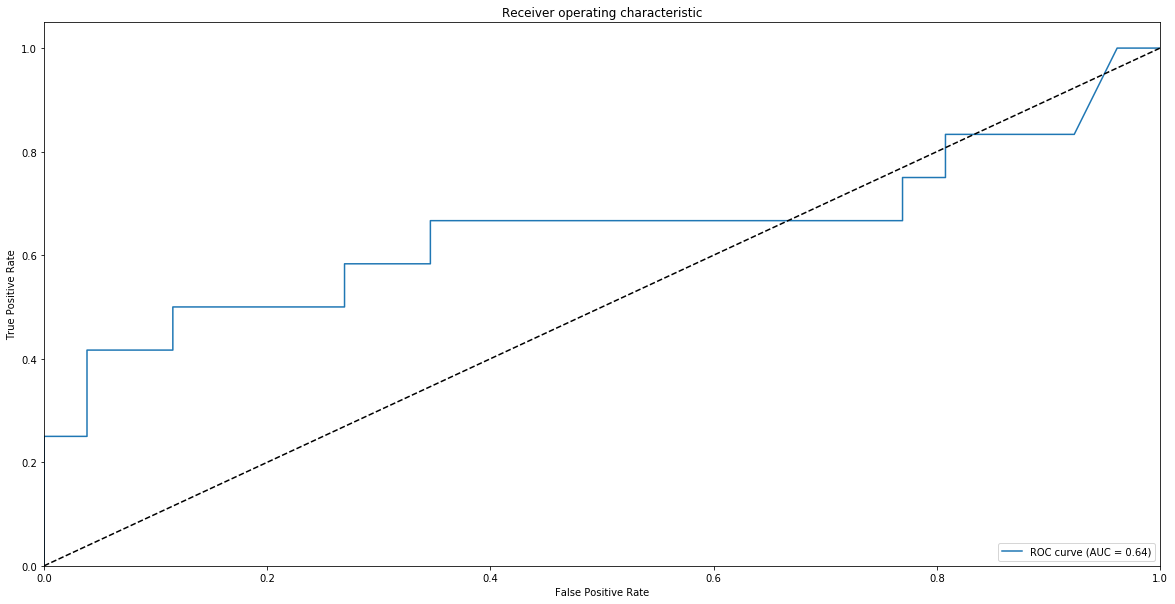

In [15]:
y_score = clf_svm.decision_function(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label = 1)

plot_roc_curves([fpr], [tpr])

#### Exercise 1.3 (Model comparison)

Train four more SVM models on the training data by varying the regularization parameter $C$ (the gamma parameter can be set to 10 again). Put the models into a list 'clfs' using the append method. You can add a name to each classifier by setting clf.name = "some description" to keep track of the configuration.

In [20]:
clfs = []

#first SVM model
clf_svm1 = SVC(gamma=10, C=0.000000001)
clf_svm1.fit(X_train, y_train)
clf_svm1.name = "0.000000001"

clfs.append(clf_svm1)


#second SVM model
clf_svm2 = SVC(gamma=10, C=2)
clf_svm2.fit(X_train, y_train)
clf_svm2.name = "2"

clfs.append(clf_svm2)


#third SVM model
clf_svm3 = SVC(gamma=10, C=0.001)
clf_svm3.fit(X_train, y_train)
clf_svm3.name = "0.001"

clfs.append(clf_svm3)


#fourth SVM model
clf_svm4 = SVC(gamma=10, C=20)
clf_svm4.fit(X_train, y_train)
clf_svm4.name = "20"

clfs.append(clf_svm4)




# c => inverse regularization
# je näher c an 0 ist, desto mehr regularisierung (underfitting)
# je näher c an 1 ist, desto overfitteter ist es

Let's have a look at the decision functions of the four classifiers...

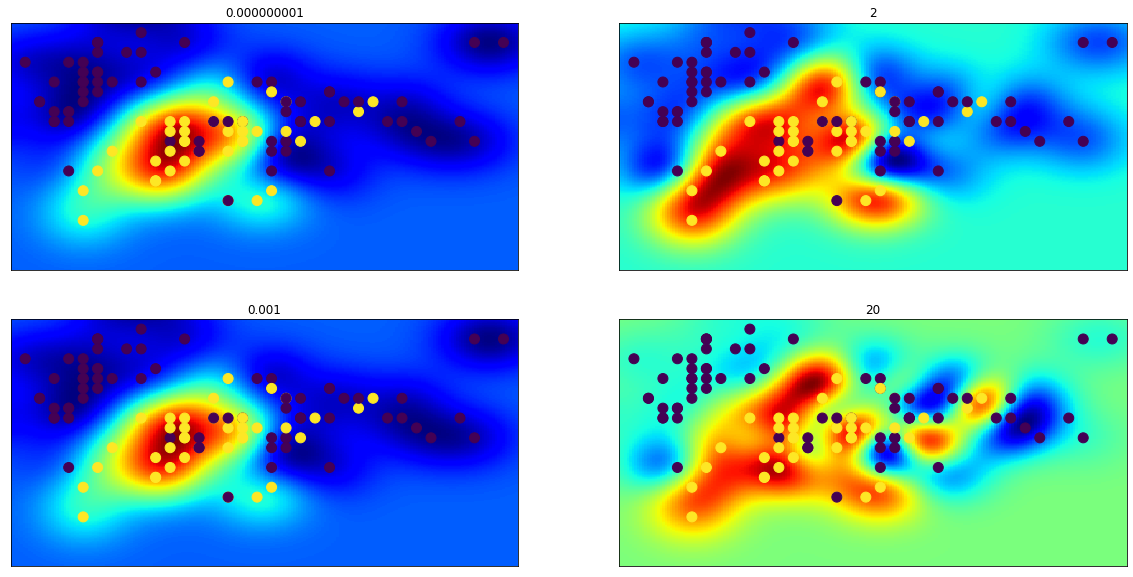

In [21]:
# visualize the decision functions of the four different classifiers
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for clf, ax in zip(clfs, axes.ravel()):
    show_decision_function(clf, ax)
    ax.set_title(clf.name)

... and draw the ROC curves.

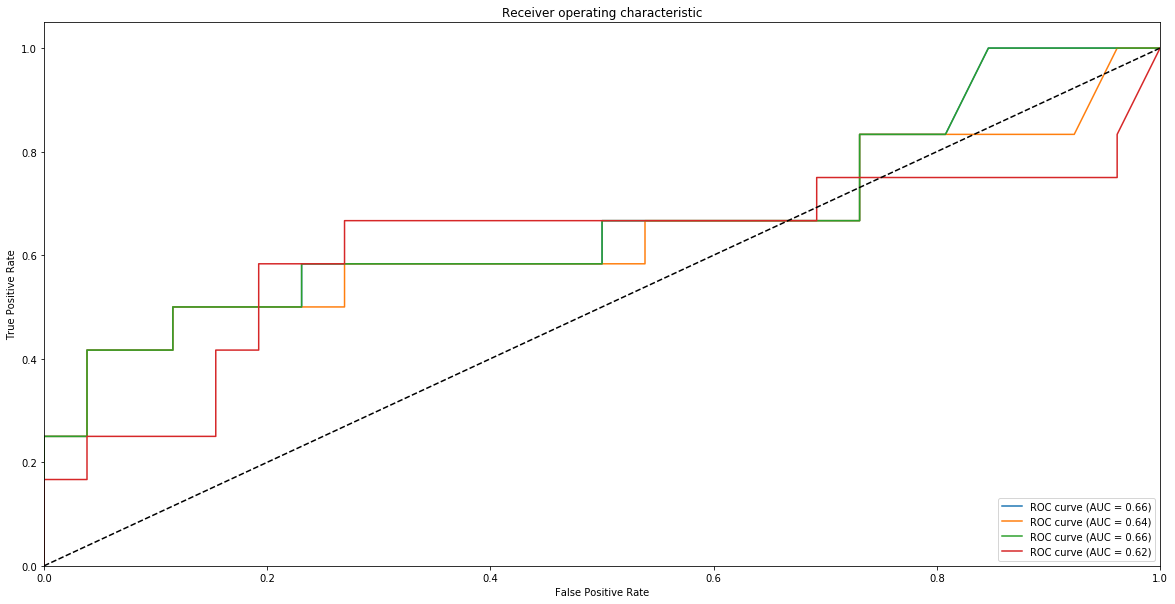

In [22]:
# draw the roc curves:

fprs, tprs = [], []

for clf in clfs:
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=1)
    fprs.append(fpr)
    tprs.append(tpr)
    
plot_roc_curves(fprs, tprs)

## 2. Hyperparameter Tuning

Many models have hyperparameters, parameters that can't directly be estimated from the data. They have to be manually tuned by the practioner, because there is no analytical formula available to calculate an appropriate value. One example is the regularization parameter $C$ in SVMs.

#### Exercise 2.1 (Nested cross-validation)

Train a SVM classifier for the detection of iris versicolor again, but this time with a proper tuning of the regularization parameter $C$ (you may set the gamma parameter to 10 again). Select a reasonable range of parameter values for $C$ and implement a nested cross-validation (as shown on the slides) by yourself. 

You can use the following helper function that creates a list of masks. Each mask can be used as an index set to select the test samples. The function accepts the number of samples *num_samples* in the dataset and the desired number of folds *k* as input parameters. Since the data is sorted by the labels the k-fold CV will likely have trouble with class imbalances in the some cases. So you should randomly shuffle the data before applying the masks.

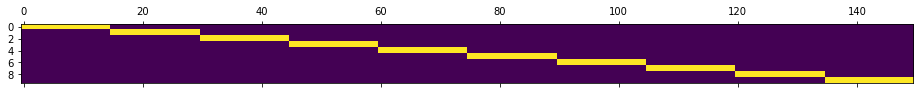

In [25]:
# helper function to create k-fold train-test-splits
def create_kfold_mask(num_samples, k):
    masks = []
    fold_size = int(num_samples / k)
    
    for i in range(k):
        mask = np.zeros(num_samples, dtype=bool)
        mask[i*fold_size:(i+1)*fold_size] = True
        masks.append(mask)
        
    return masks

# visualization of the splits created by 'create_kfold_mask'
masks = create_kfold_mask(150, 10)
plt.matshow(masks)

In [27]:
from sklearn.metrics import zero_one_loss
import operator

c_space = [0.0001, 0.001, 0.01, 1]

SEGMENTS = 10

temp_scores = []
svm_scores = {}
c_values = [] # speicher in jedem for c in c_space durchlauf das beste c, um an ende das average der besten c's zu computen als endgueltiges c

for i in range(SEGMENTS):
    for c in c_space:
        print(f'--- C = {c} ---')
        
        for j in range(SEGMENTS-1):
            
            # make sure that tuning set != testing set
            
            if j==i:
                print(f'test {i} = tune {j}. Error: tune and testset cant be the same. Go to next j: {j+1}')
                continue
            
            print('test i: ',i)
            print('tune j: ',j)
            print('--')
                
            svm = SVC(gamma=10,C=c)
            
            
            # --- create splits sets --- #
            
            # remove test-set 
            
            not_i_x = X[create_kfold_mask(150, 10)[i]==False]
            not_i_y = y[create_kfold_mask(150, 10)[i]==False]
            
            
            # create tune_set 
            
            tune_x = not_i_x[create_kfold_mask(135, 9)[j]==True]
            tune_y = not_i_y[create_kfold_mask(135, 9)[j]==True]
            
    
            # remove tuning set (test-set was alrdy removed previously)
            not_ij_x = not_i_x[create_kfold_mask(135, 9)[j]==False]
            not_ij_y = not_i_y[create_kfold_mask(135, 9)[j]==False]
        
            
            svm.fit(not_ij_x,not_ij_y)
            
            temp_scores.append(svm.score(tune_x,tune_y))
        # nach dem jedes j fuer ein c computed wurde 
        svm_scores[c] = np.mean(temp_scores)
        temp_scores = []
    sorted_scores = sorted(svm_scores.items(),key=operator.itemgetter(1),reverse=True)
    best_c = sorted_scores[0][0]
    c_values.append(best_c)
    
    # outer 4-fold-cross-validation  with best c 
    svm = SVC(gamma=10, C=best_c)
    svm.fit(X[create_kfold_mask(150, 10)[i]==False],y[create_kfold_mask(150, 10)[i]==False])
    temp_scores.append(svm.score(X[create_kfold_mask(150, 10)[i]==True],y[create_kfold_mask(150, 10)[i]==True]))
    
avg_emp_loss_bestc = np.mean(temp_scores)
average_best_c = np.mean(c_values)
svm = SVC(gamma=10, C=average_best_c)
svm.fit(X, y)

print(svm)
print('-------')
print(f'Schaetzer Accuracy: {avg_emp_loss_bestc}')

--- C = 0.0001 ---
test 0 = tune 0. Error: tune and testset cant be the same. Go to next j: 1
test i:  0
tune j:  1
--
test i:  0
tune j:  2
--
test i:  0
tune j:  3
--
test i:  0
tune j:  4
--
test i:  0
tune j:  5
--
test i:  0
tune j:  6
--
test i:  0
tune j:  7
--
test i:  0
tune j:  8
--
--- C = 0.001 ---
test 0 = tune 0. Error: tune and testset cant be the same. Go to next j: 1
test i:  0
tune j:  1
--
test i:  0
tune j:  2
--
test i:  0
tune j:  3
--
test i:  0
tune j:  4
--
test i:  0
tune j:  5
--
test i:  0
tune j:  6
--
test i:  0
tune j:  7
--
test i:  0
tune j:  8
--
--- C = 0.01 ---
test 0 = tune 0. Error: tune and testset cant be the same. Go to next j: 1
test i:  0
tune j:  1
--
test i:  0
tune j:  2
--
test i:  0
tune j:  3
--
test i:  0
tune j:  4
--
test i:  0
tune j:  5
--
test i:  0
tune j:  6
--
test i:  0
tune j:  7
--
test i:  0
tune j:  8
--
--- C = 1 ---
test 0 = tune 0. Error: tune and testset cant be the same. Go to next j: 1
test i:  0
tune j:  1
--
test i:

test i:  8
tune j:  1
--
test i:  8
tune j:  2
--
test i:  8
tune j:  3
--
test i:  8
tune j:  4
--
test i:  8
tune j:  5
--
test i:  8
tune j:  6
--
test i:  8
tune j:  7
--
test 8 = tune 8. Error: tune and testset cant be the same. Go to next j: 9
--- C = 0.01 ---
test i:  8
tune j:  0
--
test i:  8
tune j:  1
--
test i:  8
tune j:  2
--
test i:  8
tune j:  3
--
test i:  8
tune j:  4
--
test i:  8
tune j:  5
--
test i:  8
tune j:  6
--
test i:  8
tune j:  7
--
test 8 = tune 8. Error: tune and testset cant be the same. Go to next j: 9
--- C = 1 ---
test i:  8
tune j:  0
--
test i:  8
tune j:  1
--
test i:  8
tune j:  2
--
test i:  8
tune j:  3
--
test i:  8
tune j:  4
--
test i:  8
tune j:  5
--
test i:  8
tune j:  6
--
test i:  8
tune j:  7
--
test 8 = tune 8. Error: tune and testset cant be the same. Go to next j: 9
--- C = 0.0001 ---
test i:  9
tune j:  0
--
test i:  9
tune j:  1
--
test i:  9
tune j:  2
--
test i:  9
tune j:  3
--
test i:  9
tune j:  4
--
test i:  9
tune j:  5
--
